In [2]:
from math import sqrt
import numpy as np
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef
from scipy.stats import spearmanr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [29]:
def fun(s):
  df = read_csv('/content/drive/MyDrive/inno/data.csv', header=0)
  new_data = pd.DataFrame(index=range(0,len(df)),columns=['ds', 'y'])
  data = df.sort_index(ascending=True, axis=0)
  # print(data)
  for i in range(0,len(data)):
    new_data['ds'][i] = data['Date'][i]
    new_data['y'][i] = data[s][i]
  # print(new_data) 
  # new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
  new_data.index = new_data['ds']
  #preparing data
  # new_data.rename(columns={'y' : 'y', 'ds': 'ds'}, inplace=True)
  # print(new_data)
  new_data.plot()
  pyplot.show()
  n = int((len(new_data))*(0.8))
  train = new_data[:n]
  valid = new_data[n:]
  future = list()
  for i in range(0, len(valid)):
    future.append(valid['ds'][i])
  future = DataFrame(future)
  future.columns = ['ds']

  print(len(future))

  #fit the model
  # print(train.shape)
  model = Prophet()
  model.fit(train)

  
  # #predictions
  # # close_prices = model.make_future_dataframe(periods=len(valid))
  # # future = DataFrame(future)

  forecast = model.predict(future)
  print(forecast.shape)
  forecast_valid = forecast['yhat']
  print(forecast_valid.shape)
  
  print( valid['y'] )
  rmse = np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2))) 
  print('Test RMSE(Root Mean Squared Error)  : %.3f' % rmse)
  cc = spearmanr(np.array(valid['y']), np.array(forecast_valid))
  print('Test CC(Corelation Coefficient)     : %.3f' % cc.correlation)
  inv_y = valid['y']
  inv_yhat = np.array(forecast_valid)
  xpb, xob, num, den = 0, 0, 0, 0
  for y in inv_yhat:
    xpb += y
  xpb = xpb/len(inv_yhat)
  for y in inv_y:
    xob += y
    num += y - xpb
    den += y
  xob = xob/len(inv_y)
  pb = num/den
  print('Test PB(Percentage Bias)            : %.3f' % pb)
  num, den = 0, 0
  for i in range(0, len(inv_y)):
    num += ((inv_y[i] - inv_yhat[i])*(inv_y[i] - inv_yhat[i]))
    den += ((inv_y[i] - xob)*(inv_y[i] - xob))
  nse = 1 - (num/den)
  print('Test NSE(Nash Sutcliffe Efficiency) : %.3f' % nse)

  valid = pd.DataFrame()
  valid = valid.assign(Observed = inv_y)
  valid = valid.assign(Predictions = inv_yhat)
  gr = valid[['Observed', 'Predictions']]
  gr.plot()
  pyplot.show()


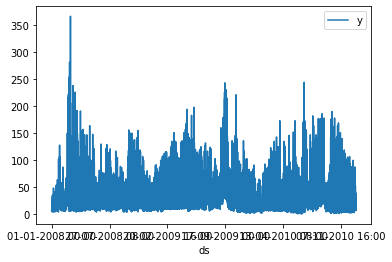

5261
(5261, 22)
(5261,)
ds
26-05-2010 19:00    5.29
26-05-2010 20:00       5
26-05-2010 21:00    5.89
26-05-2010 22:00    5.22
26-05-2010 23:00    4.08
                    ... 
31-12-2010 19:00    10.2
31-12-2010 20:00    8.98
31-12-2010 21:00    9.46
31-12-2010 22:00     7.6
31-12-2010 23:00    7.52
Name: y, Length: 5261, dtype: object
Test RMSE(Root Mean Squared Error)  : 35.242
Test CC(Corelation Coefficient)     : 0.395
Test PB(Percentage Bias)            : 0.308
Test NSE(Nash Sutcliffe Efficiency) : -0.001


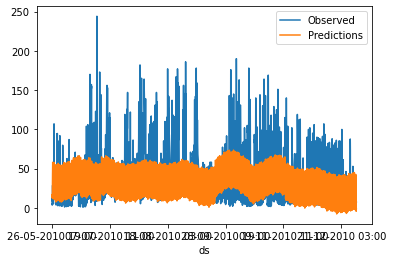

In [30]:
fun('O3')

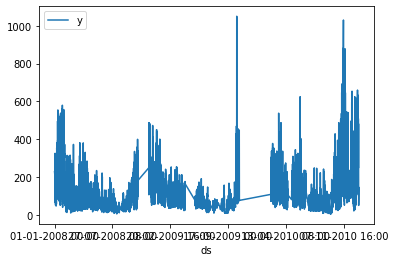

5261
(5261, 22)
(5261,)
ds
26-05-2010 19:00    76.6
26-05-2010 20:00    94.4
26-05-2010 21:00     121
26-05-2010 22:00     159
26-05-2010 23:00     172
                    ... 
31-12-2010 19:00     116
31-12-2010 20:00     132
31-12-2010 21:00     145
31-12-2010 22:00     146
31-12-2010 23:00     141
Name: y, Length: 5261, dtype: object
Test RMSE(Root Mean Squared Error)  : 132.206
Test CC(Corelation Coefficient)     : 0.509
Test PB(Percentage Bias)            : 0.253
Test NSE(Nash Sutcliffe Efficiency) : 0.114


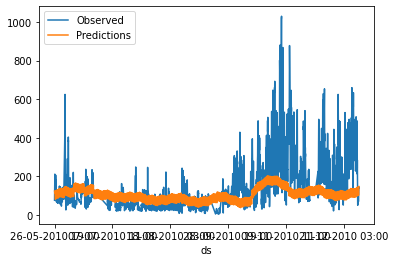

In [31]:
fun('PM2.5')

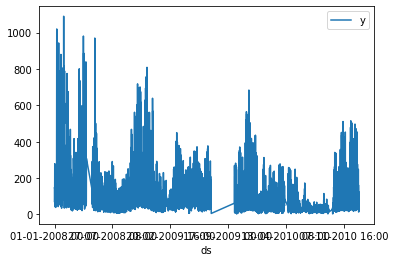

5261
(5261, 22)
(5261,)
ds
26-05-2010 19:00    42.6
26-05-2010 20:00      59
26-05-2010 21:00    85.1
26-05-2010 22:00    90.8
26-05-2010 23:00    78.5
                    ... 
31-12-2010 19:00    31.4
31-12-2010 20:00    40.8
31-12-2010 21:00    38.3
31-12-2010 22:00      37
31-12-2010 23:00    56.7
Name: y, Length: 5261, dtype: object
Test RMSE(Root Mean Squared Error)  : 78.783
Test CC(Corelation Coefficient)     : 0.373
Test PB(Percentage Bias)            : 0.361
Test NSE(Nash Sutcliffe Efficiency) : 0.070


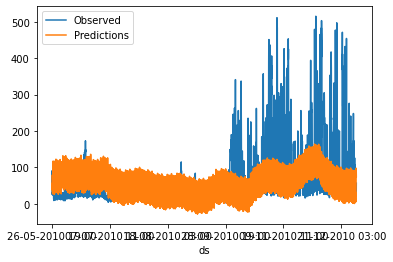

In [32]:
fun('NOx_Target')

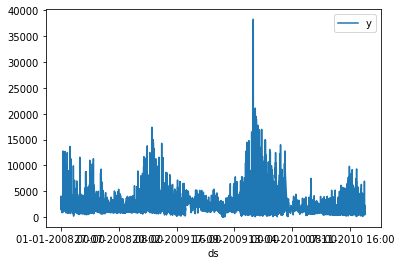

5261
(5261, 22)
(5261,)
ds
26-05-2010 19:00       1420
26-05-2010 20:00       1500
26-05-2010 21:00       1330
26-05-2010 22:00       1250
26-05-2010 23:00       1250
                     ...   
31-12-2010 19:00        804
31-12-2010 20:00       1060
31-12-2010 21:00    991.667
31-12-2010 22:00    923.333
31-12-2010 23:00        855
Name: y, Length: 5261, dtype: object
Test RMSE(Root Mean Squared Error)  : 1555.563
Test CC(Corelation Coefficient)     : 0.191
Test PB(Percentage Bias)            : -0.410
Test NSE(Nash Sutcliffe Efficiency) : -0.489


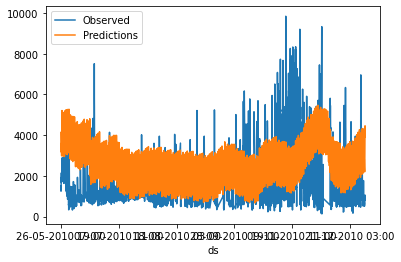

In [33]:
fun('CO_Traget')